In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('concrete')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 1000, hidden_layers = [50, 50], learning_rate = 0.005, exp_decay = .995)

initial loss:  13.858184814453125
nllk loss:  tensor(1.0124, grad_fn=<MeanBackward0>) kernel loss: tensor(4.2819, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.9564, grad_fn=<MeanBackward0>) kernel loss: tensor(11.9017, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.8651, grad_fn=<MeanBackward0>) kernel loss: tensor(13.0091, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.7588, grad_fn=<MeanBackward0>) kernel loss: tensor(7.5346, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.6340, grad_fn=<MeanBackward0>) kernel loss: tensor(7.3289, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.5189, grad_fn=<MeanBackward0>) kernel loss: tensor(7.5992, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.3853, grad_fn=<MeanBackward0>) kernel loss: tensor(4.7781, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.4381, grad_fn=<MeanBackward0>) kernel loss: tensor(2.4100, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.3534, grad_fn=<MeanBackward0>) kernel loss: tensor(6.8210, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.2937, g

nllk loss:  tensor(-0.2603, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2845, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.2789, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7672, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.2971, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2156, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3016, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5288, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3150, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0306, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3258, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5627, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3219, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4714, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3306, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2401, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3232, grad_fn=<MeanBackward0>) kernel loss: tensor(1.2765, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.3311, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-0.8096, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4693, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8087, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3869, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8208, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6413, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8288, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2291, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8422, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2108, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8438, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2946, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8462, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3531, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8462, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1455, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8671, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0485, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8649, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-1.1081, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2875, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1202, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2948, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1238, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6215, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1182, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1195, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1230, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1618, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1100, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2277, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1226, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1821, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1294, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0498, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1296, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3230, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.1381, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-1.3125, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2167, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.2986, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3634, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.2996, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2638, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3107, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2160, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3132, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0160, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3203, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2414, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3165, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0266, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3249, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2784, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3208, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3340, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.3193, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-1.4407, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2926, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4382, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1505, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4403, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0304, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4402, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0146, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4405, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3293, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4426, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1802, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4400, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1858, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4438, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0409, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4449, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0527, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.4493, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-1.5171, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1603, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5175, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1724, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5177, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2100, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5165, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0588, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5164, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2127, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5162, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1097, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5186, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0988, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5189, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1201, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5196, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0171, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5213, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-1.5652, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2606, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5656, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1277, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5666, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1305, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5667, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5681, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0595, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5677, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2083, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5677, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0259, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5683, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0357, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5689, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0293, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.5695, grad_fn=<MeanBackward0>) kernel

nllk loss:  tensor(-1.6013, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0128, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6020, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1278, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6025, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0720, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6032, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0578, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6036, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1363, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6036, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2137, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6041, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3514, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6043, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1636, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6044, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2936, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6045, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-1.6206, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2014, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6210, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2626, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6213, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3386, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6218, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1620, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6214, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2722, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6215, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0181, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6220, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0990, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6225, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1931, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6226, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0608, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6227, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-1.6351, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1875, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6349, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2489, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6349, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1146, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6352, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2740, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6356, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0562, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6357, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2915, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6359, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2648, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6359, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1032, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6360, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0313, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.6360, grad_fn=<MeanBackward0>) ke

End2end test MAPE:  0.16548645
End2end test RMSE:  6.0245852
End2end test NLLK:  4.3553224
End2end test CRPS:  tensor(3.1765)


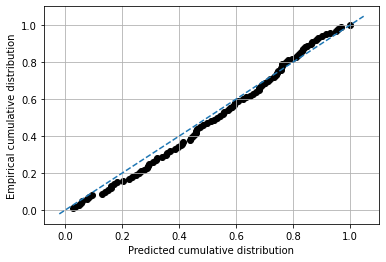

End2end test calibration error when step size is 0.001:  1.281155612244898
End2end test calibration error when step size is 0.01:  0.12617346938775512
End2end test calibration error when step size is 0.1:  0.014362244897959179


In [5]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.59it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.46it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 10.83it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           4.468
  RMSE          6.025
  MDAE          3.263
  MARPD         14.653
  R2            0.871
  Correlation   0.934
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.051
  Mean-absolute Calibration Error       0.043
  Miscalibration Area                   0.043
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.126
     Group Size: 0.56 -- Calibration Error: 0.067
     Group Size: 1.00 -- Calibration Error: 0.043
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.145
     Group Size: 0.56 -- Calibration Error: 0.075
     Group Size: 1.00 -- Calibration Error: 0.051
===============

Lims is None. Setting lims now:
min_max_true: (2.33, 80.2)
min_max_pred: (4.1882553, 79.456375)
lims: (2.33, 80.2)
lims_ext: (-5.456999588012696, 87.98699645996093)


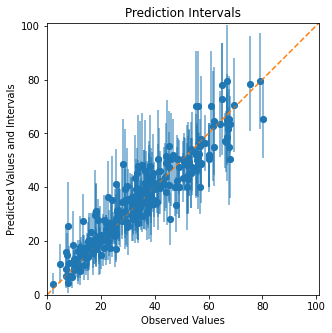

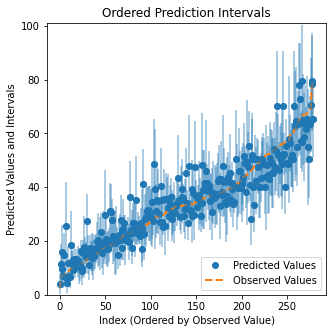

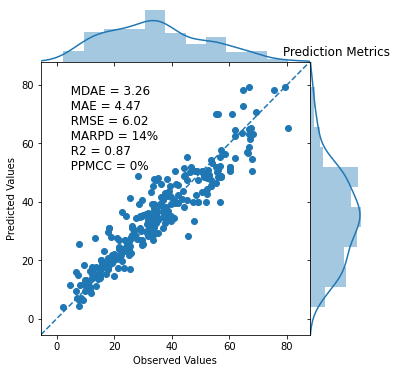

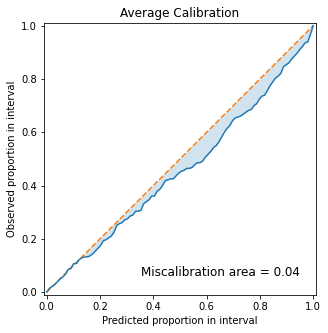

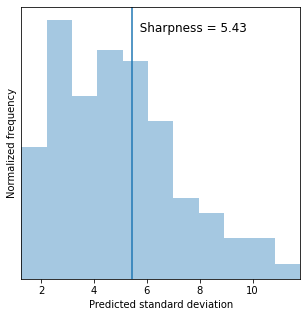

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))